<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250509_LAB_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-01.LAB_Iris_學號_姓名  (例: "05-01.LAB_Iris_00_陳仁政")
* 附件檔名請設定為： 05-01.LAB_Iris_學號_姓名.ipynb (例: "05-01.LAB_Iris_00_陳仁政.ipynb")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("../content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# 此步驟可先查看data有那些欄位
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

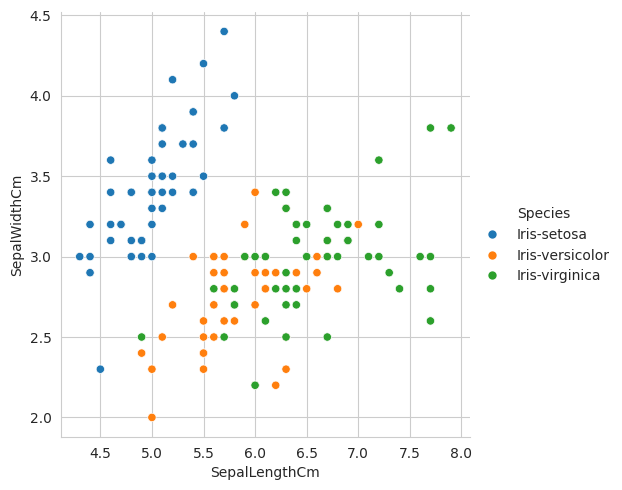

In [6]:
# 根據 SepalLengthCm 與 SepalWidthCm 兩個欄位來畫出 三種不同種類花的資料點分布圖
sns.relplot(data=data,x='SepalLengthCm', y = 'SepalWidthCm', hue='Species')
plt.show()

### ↑ 問題：從上圖可以看出什麼關係？

Ans：可以從花瓣的長寬分佈比對、推估出三種鳶尾大致的外觀傾向(短胖、瘦長等等)

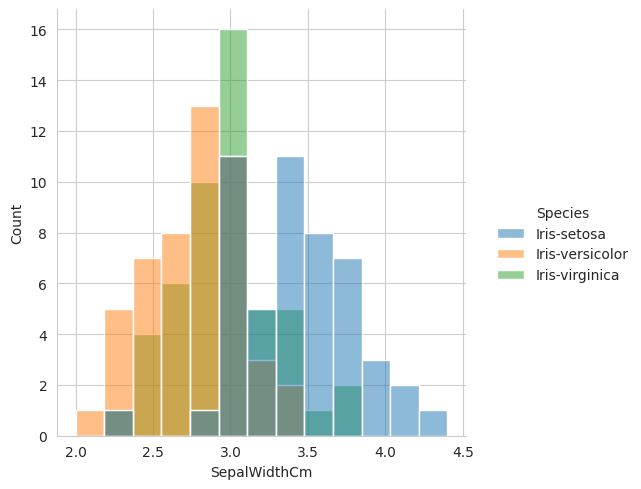

In [ ]:
 # 畫出 SepalWidthCm 的直方圖，並分成三類
sns.displot(data, x="SepalWidthCm", hue="Species")

In [ ]:
# 練習題
# 根據上圖看看其他三個欄位的直方圖分布
# 並說明那些欄位比較容易進行分類

Ans：從以下三個直方圖來看，PetalWidthCm與PetalLengthCm的直方圖比較能看出三種分群，另兩個欄位所畫直方圖比較有交錯在一起的情況。

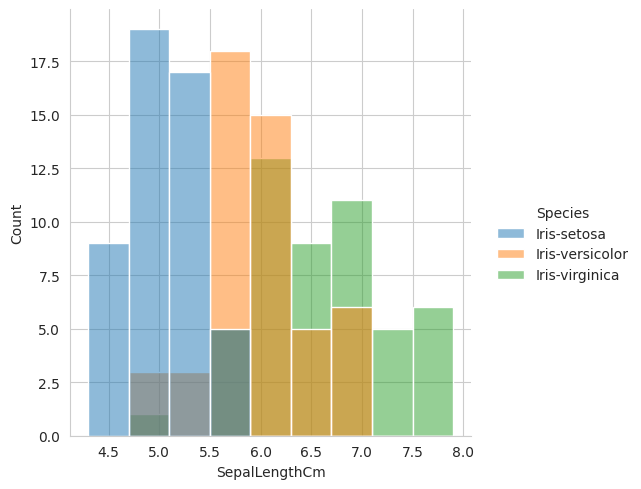

In [ ]:
sns.displot(data, x="SepalLengthCm", hue="Species")

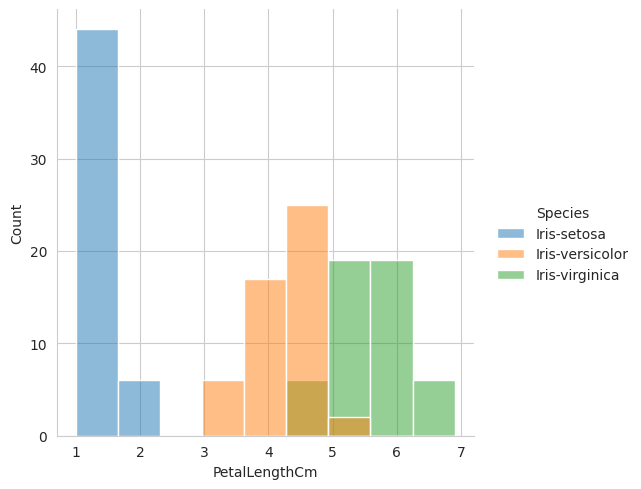

In [ ]:
sns.displot(data, x="PetalLengthCm", hue="Species")

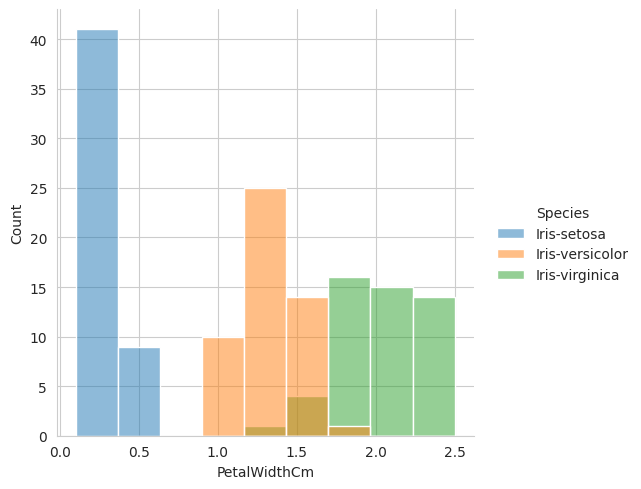

In [ ]:
sns.displot(data, x="PetalWidthCm", hue="Species")

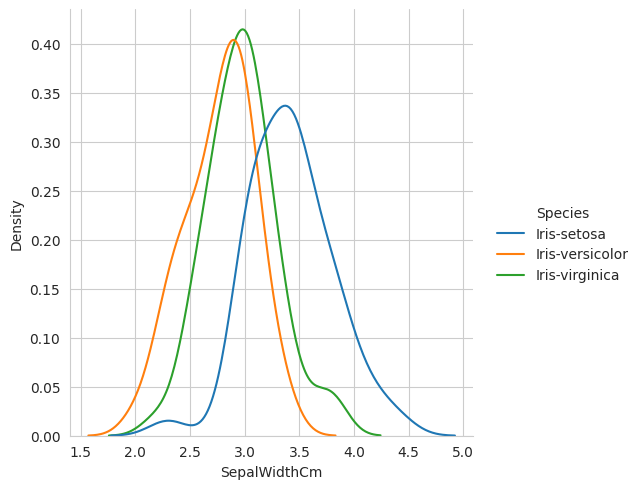

In [ ]:
# 畫出 SepalWidthCm 的KDE圖，並分成三類
sns.displot(data, x="SepalWidthCm", hue="Species", kind='kde')

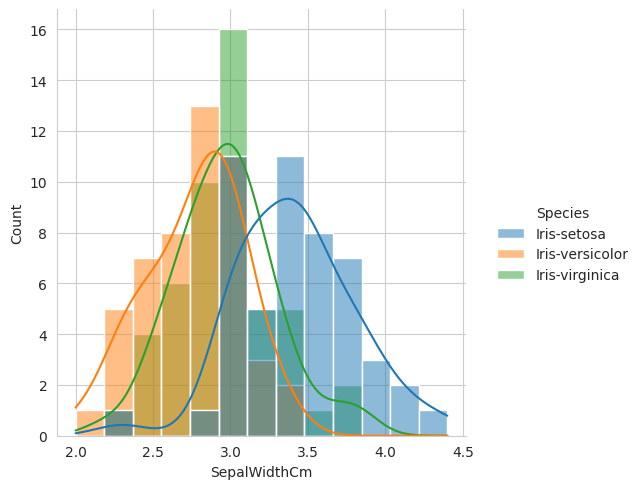

In [ ]:
# 同時顯示直方圖與KDE圖
sns.displot(data, x="SepalWidthCm", hue="Species", kde=True)

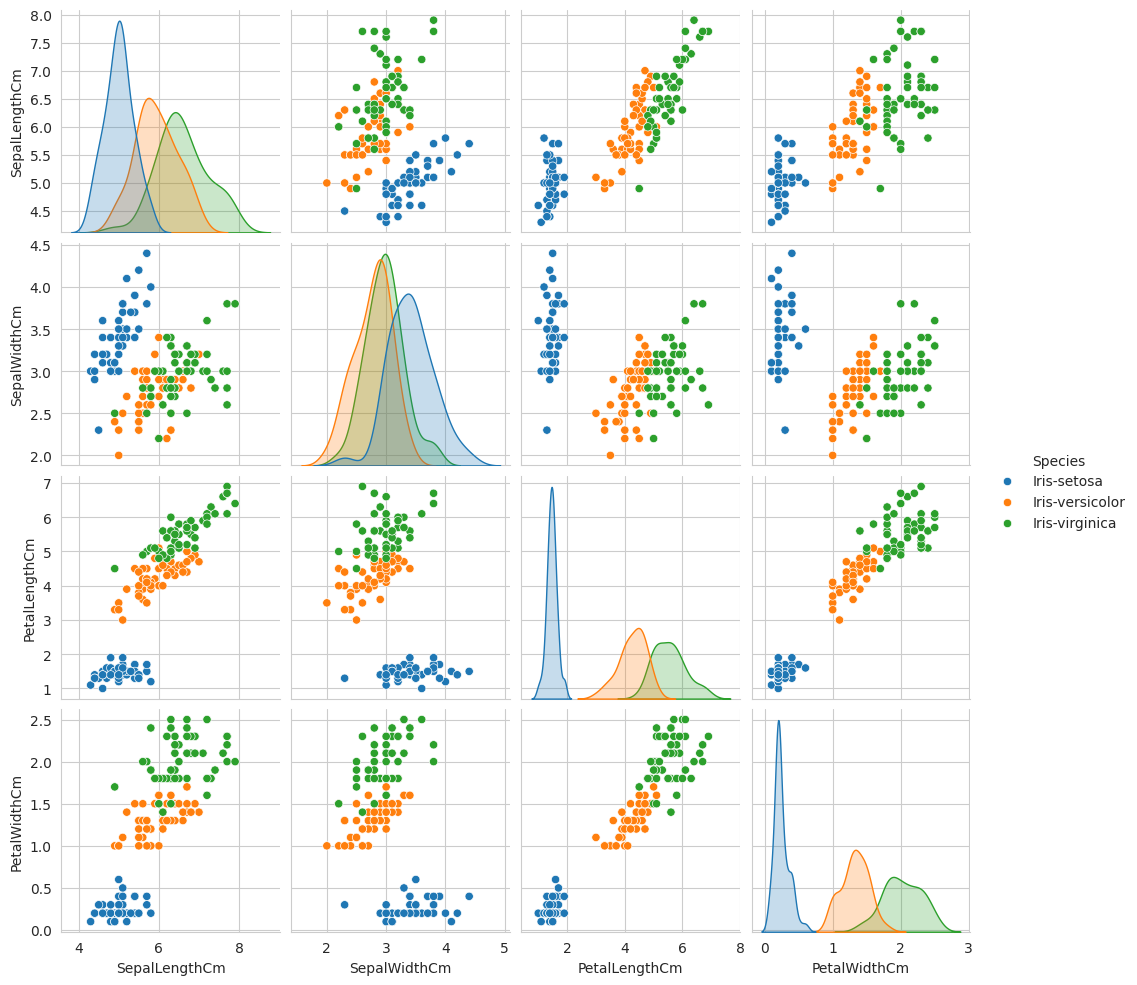

In [7]:
# 使用 Pairplot來畫出散布圖矩陣
sns.pairplot(data=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue='Species')
plt.show()

### ↑ 問題：從上圖可以看出什麼關係？

Ans：可以觀察出花瓣的長度與花瓣的寬度會是區分品種的重要特徵，而且相關性相當高，所以其實將來選用其中一個就可以(因為另一個的資訊幾乎可以同步揭露)

In [8]:
#計算四個欄位的相關性係數矩陣
data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


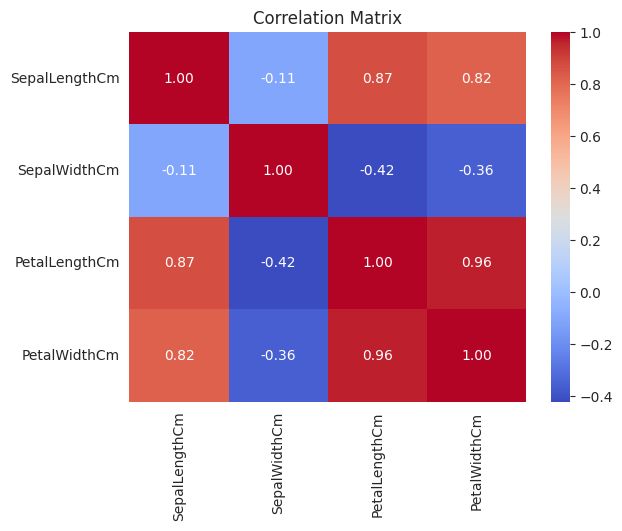

In [10]:
#計算四個欄位的相關性係數矩陣
#熱力圖
corr_matrix = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

### ↑ 問題：從上圖可以看出什麼關係？

Ans.可以從熱力圖的顏色直觀看出相關性高低(其中一個斜對角因為會是跟自己本身是同一個欄位而為1.00)，超過0.8通常便是代表有高相關性